In [7]:
import pandas as pd
import numpy as np
from google.colab import files


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

EXPLORING DATA AND PREPROCESSING

In [10]:
uploaded=files.upload()

Saving ML Assignment Dataset - Train.csv to ML Assignment Dataset - Train.csv


In [11]:
data = pd.read_csv("ML Assignment Dataset - Train.csv")


In [12]:
data.rename(columns={
    'tweet_text': 'text',
    'emotion_in_tweet_is_directed_at': 'brand',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
}, inplace=True)

In [ ]:
data.head(15)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       8588 non-null   object
 1   brand      3291 non-null   object
 2   sentiment  8589 non-null   object
dtypes: object(3)
memory usage: 201.4+ KB


In [15]:
data[data['text'].isnull()]

,text,brand,sentiment
6,NaN,NaN,No emotion toward brand or product


In [16]:
data = data.dropna(subset=['text'])

In [17]:
data.describe()

,text,brand,sentiment
count,8588,3291,8588
unique,8561,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5388


In [18]:
data['sentiment'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2672
Negative emotion                       519
I can't tell                             9
Name: sentiment, dtype: int64

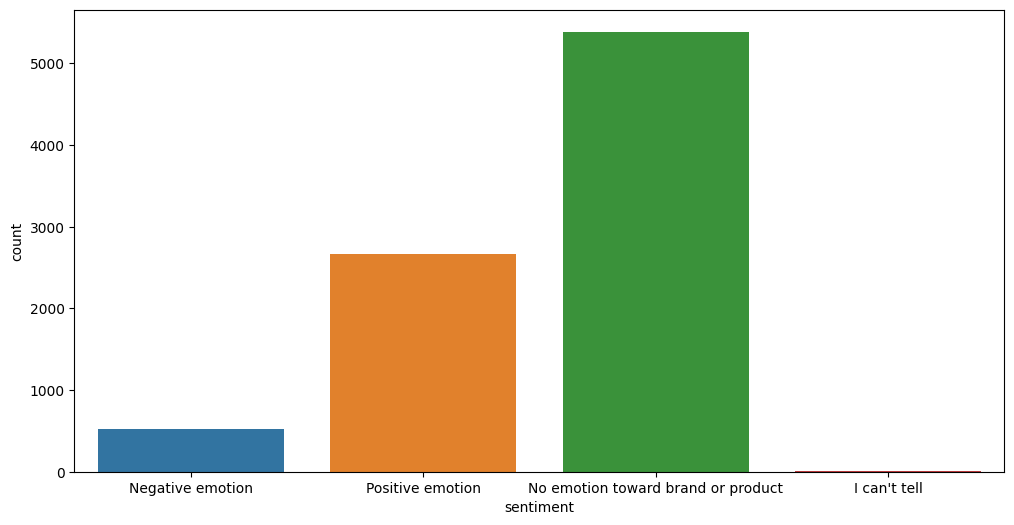

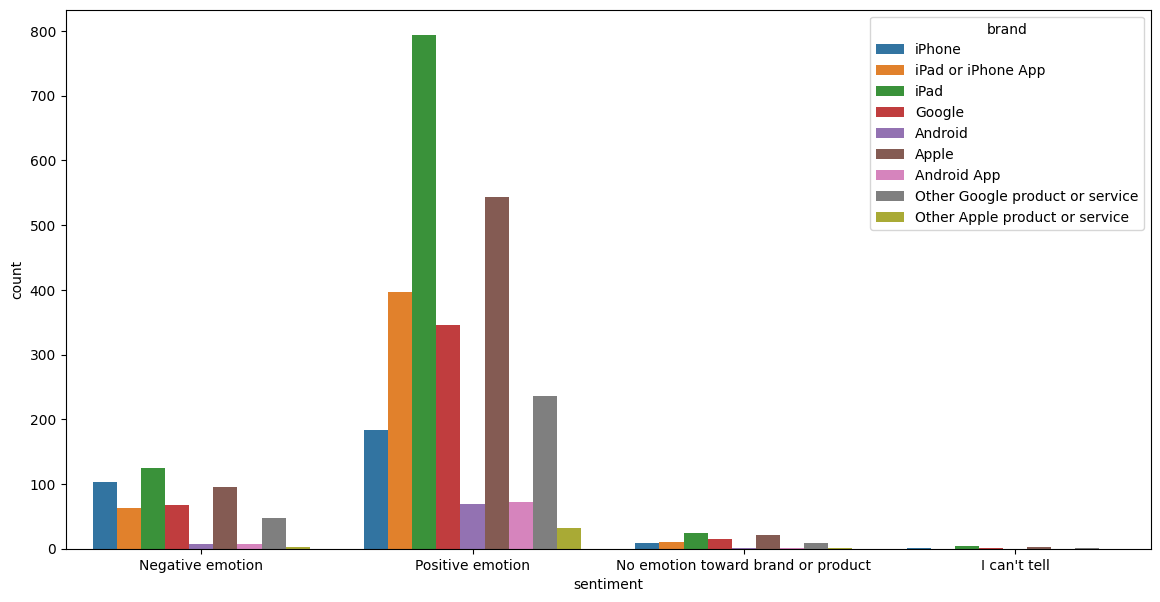

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', data=data)
plt.show()


plt.figure(figsize=(14, 7))
sns.countplot(x='sentiment', hue='brand', data=data)
plt.show()


In [20]:
# this graph tells that the emotions related to brands generally stay on positive side.

In [21]:
train_data, val_data, train_labels, val_labels = train_test_split(
    data[['text', 'brand']], data['sentiment'], test_size=0.2, random_state=42
)

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing Punctuation and Special Characters
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming (you can use lemmatization if needed)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into text
    processed_text = ' '.join(tokens)

    return processed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
train_data['text'] = train_data['text'].apply(preprocess_text)

In [24]:
train_data['text'].head(15)



6570    rt mention win ipad rt mention dgtltribe learn...
4206    made time mention podcast strang iphon correct...
3890    appl naomi campbel popup store rage link sxsw ...
2358    ipad found friend jeff sxsw thank everyon help...
59      quotvia mention link guy kawasaki talk enchant...
2304    appl hp pop sxsw set temp site link austin atx...
2359    pack mani appl devic alarm set 515am see yall ...
1804        load groupm app iphon load sxsw brethren link
7526    mention saw u r go sxsw dwnld groundlink app a...
5884            rt mention ipad 2 sxsw thank mention fxsw
7048    lt3 appl rt mention appl open popup store aust...
7650    sxsw mistak made build netflix iphon plu see s...
8237    help austin relay user impart use recon info s...
97      headlin quotipad 2 musthav gadget sxswquot hmm...
5883    rt mention took survey iphon starbuck line got...
Name: text, dtype: object

In [25]:
data.head(15)

,text,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion


In [ ]:


models = [
    ('MultinomialNB', MultinomialNB()),
    ('SVM', SVC()),
    ('LogisticRegression', LogisticRegression()),
    ('RandomForest', RandomForestClassifier())
]

#  parameter grid
param_grids = {
    'MultinomialNB': {
        'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
        'tfidfvectorizer__max_features': [1000, 5000, None],
        'multinomialnb__alpha': [0.1, 0.5, 1.0],
        'tfidfvectorizer__sublinear_tf': [True, False],
        'tfidfvectorizer__use_idf': [True, False]
    },
    'RandomForest': {
        'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
        'tfidfvectorizer__max_features': [1000, 5000, None],
        'randomforestclassifier__n_estimators': [50, 100, 200],
        'randomforestclassifier__max_depth': [None, 10, 20],
        'tfidfvectorizer__sublinear_tf': [True, False],
        'tfidfvectorizer__use_idf': [True, False]
    },
    'SVM': {
        'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
        'tfidfvectorizer__max_features': [1000, 5000, None],
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf'],
        'tfidfvectorizer__sublinear_tf': [True, False],
        'tfidfvectorizer__use_idf': [True, False]
    },
    'LogisticRegression': {
        'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
        'tfidfvectorizer__max_features': [1000, 5000, None],
        'logisticregression__C': [0.1, 1, 10],
        'tfidfvectorizer__sublinear_tf': [True, False],
        'tfidfvectorizer__use_idf': [True, False]
    }
}


for model_name, model in models:
    print(f"Training {model_name}...")

    # pipeline for the current model
    pipeline = make_pipeline(TfidfVectorizer(), model)

    # Hyperparameter tuning
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(train_data['text'], train_labels)

    # Using the best model from the grid search
    best_model = grid_search.best_estimator_

    # Predict on the val data
    test_predictions = best_model.predict(val_data['text'])

    # Obtain the classification report
    report = classification_report(val_labels, test_predictions)

    # Print the classification report
    print(f"\nClassification Report for {model_name}:\n{report}\n{'='*50}\n")


Training MultinomialNB...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report for MultinomialNB:
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00         1
                  Negative emotion       0.67      0.02      0.05        85
No emotion toward brand or product       0.67      0.96      0.79      1072
                  Positive emotion       0.73      0.23      0.35       560

                          accuracy                           0.68      1718
                         macro avg       0.52      0.30      0.30      1718
                      weighted avg       0.69      0.68      0.61      1718


Training SVM...
